In [1]:
import pandas as pd

In [2]:
athletes = pd.read_csv("bgadoci-crossfit-data/athletes.csv")
athletes

/Users/spencerkimball/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong,retrieved_datetime
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|,NaN
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|,NaN
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423001,574489.0,Odo Renata,Latin America,Team Guarujá Inox,CrossFit Guaruja,Female,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:05
423002,585696.0,Lozzie Trevor,Australia,FBP CrossFit Games Team,FBP CrossFit,Female,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:06
423003,608828.0,Marisol Smith,North West,CrossFit Oak Harbor,CrossFit Oak Harbor,Female,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-25 09:55:07
423004,628881.0,Pedrini Morgane,Europe,NaN,CrossFit 67,Female,20.0,64.0,61.0,NaN,...,80.0,143.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,NaN,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I strictly s...,6-12 months|,2015-03-25 09:55:07


## Braden's Preprocessing Section - Join Data and Filter Columns

In [3]:
# First need to read in the leader dataset
leader = pd.read_csv("bgadoci-crossfit-data/leaderboard.15.csv")

In [4]:
# Join on athlete ID
df = pd.merge(athletes, leader, on='athlete_id', how='inner')
# Make sure it looks okay
df.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,schedule,howlong,retrieved_datetime_x,year,division,stage,rank,score,retrieved_datetime_y,scaled
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,5.0,44119.0,771.0,2015-03-31 21:47:26,0
1,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.0,43966.0,130.0,2015-03-31 23:02:54,0
2,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.1,32461.0,225.0,2015-03-31 23:30:57,0
3,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,2.0,58455.0,78.0,2015-03-31 23:53:31,0
4,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,3.0,30179.0,314.0,2015-04-01 00:27:51,0


In [5]:
# Drop all of our na's and check for unique values in each column
testing = df.dropna()
testing.nunique()

athlete_id               679
name                     679
region                    17
team                     574
affiliate                567
gender                     2
age                       38
height                    23
weight                   120
fran                     313
helen                    335
grace                    270
filthy50                 503
fgonebad                 247
run400                    95
run5k                    381
candj                    120
snatch                   113
deadlift                 141
backsq                   133
pullups                   80
eat                       23
train                     45
background                18
experience                43
schedule                  51
howlong                   12
retrieved_datetime_x     675
year                       1
division                   2
stage                      6
rank                    2427
score                    775
retrieved_datetime_y    2211
scaled        

NOTE: We noticed in our EDA that several variables had absurd responses: 800,000 pullups, 5,000 lb. back squat etc... So we used our best judgement to determine where the cutoff for a reasonable score on each continuous variable might be.

In [6]:
# How many rows we have before
print(len(testing))

3802


In [7]:
# Filtered Dataframes
testing = testing[testing['fran'] < 1250]
testing = testing[testing['helen'] < 2000]
testing = testing[testing['grace'] < 1000]
testing = testing[testing['filthy50'] < 4000]
testing = testing[testing['fgonebad'] < 625]
testing = testing[testing['run400'] < 200]
testing = testing[testing['run5k'] < 3000]
testing = testing[testing['candj'] < 500]
testing = testing[testing['snatch'] < 350]
testing = testing[testing['deadlift'] < 750]
testing = testing[testing['backsq'] < 750]
testing = testing[testing['pullups'] < 74]


In [8]:
# Number of rows now
print(len(testing))

3625


3802
3625

<AxesSubplot:>

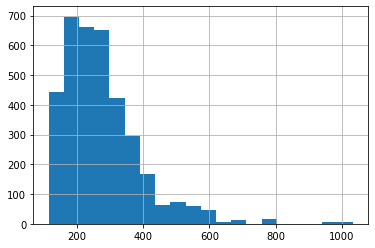

In [9]:
# Histogram to illustrate the distribution looks okay 
testing.fran.hist(bins = 20)



In [10]:
#athletes.eat.unique()

Possible values for eat:
* I eat quality foods but don't measure the amount
* I eat strict Paleo
* I eat 1-3 full cheat meals per week
* I eat whatever is convenient
* I weigh and measure my food

In [11]:
#athletes.train.unique()

Possible values for train:
* I workout mostly at a CrossFit Affiliate
* I have a coach who determines my programming
* I record my workouts
* I incorporate CrossFit.com workouts
* I write my own programming
* I workout mostly at home, work, or a traditional gym



In [12]:
import numpy as np
athletes = testing

In [13]:
# calculate dummies for train column
athletes = athletes.dropna()
a = athletes["train"].str.split('|').explode().to_frame()
cols = a["train"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["train"])[cols]], axis=1)

athletes.drop('train', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
#athletes

In [14]:
# calculate dummies for background column
a = athletes["background"].str.split('|').explode().to_frame()
cols = a["background"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["background"])[cols]], axis=1)

athletes.drop('background', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
#athletes


In [15]:
# calculate dummies for experience column
a = athletes["experience"].str.split('|').explode().to_frame()
cols = a["experience"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["experience"])[cols]], axis=1)

athletes.drop('experience', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
#athletes

In [16]:
# calculate dummies for schedule column
a = athletes["schedule"].str.split('|').explode().to_frame()
cols = a["schedule"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["schedule"])[cols]], axis=1)

athletes.drop('schedule', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
#athletes

In [17]:
#athletes.background.unique()

Possible values for background:
* I played youth or high school level sports
* I regularly play recreational sports
* I played college sports
* I have no athletic background besides CrossFit
* I played professional sports

In [18]:
#athletes.experience.unique()

Possible values for experience: 
* I began CrossFit with a coach (e.g. at an affiliate)
* I have attended one or more specialty courses
* I have had a life changing experience due to CrossFit
* I began CrossFit by trying it alone (without a coach)
* I have completed the CrossFit Level 1 certificate course
* I train other people


In [19]:
#athletes.schedule.unique()

Possible values for schedule:
* I do multiple workouts in a day 2x a week
* I usually only do 1 workout a day
* I strictly schedule my rest days
* I typically rest 4 or more days per month
* I do multiple workouts in a day 3+ times a week
* I typically rest fewer than 4 days per month
* I do multiple workouts in a day 1x a week

In [20]:
#athletes.howlong.unique()

In [21]:
#athletes.age.describe()
#athletes.height.describe()
#athletes.weight.describe()
#athletes.fran.describe()
#athletes.helen.describe()
#athletes.grace.describe()
#athletes.filthy50.describe()
#athletes.fgonebad.describe()
#athletes.run400.describe()
#athletes.run5k.describe()
#athletes.candj.describe()
#athletes.snatch.describe()
#athletes.deadlift.describe()
#athletes.backsq.describe()
#athletes.pullups.describe()

Decision tree model

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from math import sqrt

In [23]:
# split train and test
# done above

In [24]:
def PipeTree(max_depth=None):
    return make_pipeline(StandardScaler(),
                         DecisionTreeRegressor(max_depth=6, random_state=0))

In [25]:
pipe = PipeTree()
pipe.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
pipe = PipeTree(max_depth=5)
pipe.fit(X_train,y_train)

In [ ]:
pipe = PipeTree(max_depth=3)
pipe.fit(X_train,y_train)

In [ ]:
pipe.named_steps

In [ ]:
# takes a long time to run (3-5 minutes)
param_grid = [{'decisiontreeregressor__max_depth': list(np.arange(1,50))},
             {'decisiontreeregressor__min_samples_leaf': list(np.arange(1,20))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
gs.best_params_

In [ ]:
pipe = PipeTree(max_depth=16)
pipe.fit(X_train,y_train)



In [ ]:
y_hat = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
mse
#yikes

bagging

knn

In [28]:
# calculate dummies for eat column
a = athletes["eat"].str.split('|').explode().to_frame()
cols = a["eat"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["eat"])[cols]], axis=1)

athletes.drop('eat', axis=1, inplace=True)  

In [29]:
def PipeKNN(neighbors=1):
    return make_pipeline(StandardScaler(),
                         KNeighborsRegressor(n_neighbors=neighbors))

In [30]:
athletes = athletes.astype({'region': 'category', 
                            'team': 'category', 
                            'gender': 'category',  
                            'affiliate': 'category'})

In [31]:
categorical_cols = ['region', 'team', 'gender', 'affiliate','howlong'] 
df_with_dummies = pd.get_dummies(athletes, columns = categorical_cols)

In [ ]:
#list(df_with_dummies.columns)

In [32]:
# The knn process works the same for males or females, or both
# We were curious to see if you could predict better based on if the data was subsetted based on gender or not
# But they turned out to have very similar rmse
is_female =  df_with_dummies['gender_Female']==1
df_with_dummies_female = df_with_dummies[is_female]
test_column = 'run400'

In [33]:
y = df_with_dummies_female["rank"].to_numpy()

In [34]:
X = df_with_dummies_female.drop(columns = ['athlete_id','name','year','rank','retrieved_datetime_y','retrieved_datetime_x','division'])
# drop division because everyone is in division 1 for males or females


In [35]:
# This defines a function that is able to run the knn test based on a single column like 'pullups' or 'fran'
# simply call the function with the column in quotes that you want, full_knn('fran')

# It will output two graphs.
# First graph is the points of the run400 values in regards to their rank,
# The second graph is the rmse values for each value of the number of neighbors
# up until the best parameter number of neighbors from the grid search.

def full_knn(test_column):
    X_1 = X[[test_column]]
    X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
    X_train.reset_index()

    pipe = PipeKNN(1)
    pipe.fit(X_train,y_train)
    sns.scatterplot(x=X_train[test_column], y=y_train)

    param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
    gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
    gs.fit(X_train, y_train)

    best_neighbor_n = gs.best_params_['kneighborsregressor__n_neighbors']
    pipe = PipeKNN(best_neighbor_n)
    
    pipe.fit(X_train,y_train)
    sns.scatterplot(x=X_train[test_column], y=y_train)
    
    X_plot = pd.DataFrame(np.linspace(min(X_train[test_column]),max(X_train[test_column]),5000), columns=[test_column])

    g = sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='blue')
    g.set(xlim=(min(X_train[test_column]), max(X_train[test_column])))
    
    rmse_val = [] #to store rmse values for different k
    
    best_k = gs.best_params_['kneighborsregressor__n_neighbors']
    
    for K in range(0, best_k):
        K = K+1
        model = KNeighborsRegressor(n_neighbors = K)

        model.fit(X_train, y_train)  #fit the model
        pred=model.predict(X_test) #make prediction on test set
        error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
        rmse_val.append(error) #store rmse values
        #print('RMSE value for k=' , K , 'is:', error)

    curve = pd.DataFrame(rmse_val) #elbow curve 
    curve.plot()
    
    return gs.best_params_['kneighborsregressor__n_neighbors']
    

9

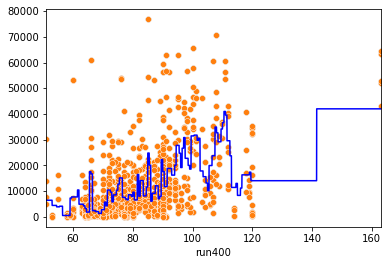

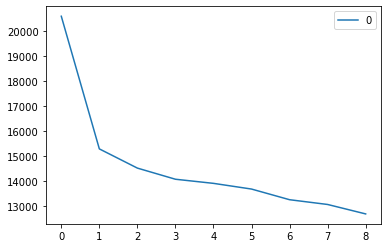

In [36]:
full_knn('run400')

In [ ]:
full_knn('backsq')


In [ ]:
#full_knn('helen')

3

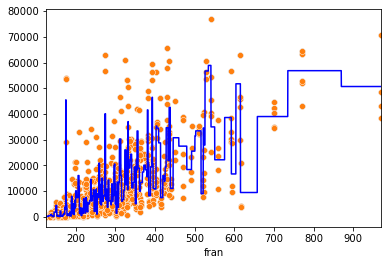

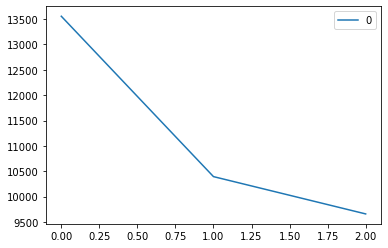

In [39]:
full_knn('fran')

In [ ]:
full_knn('run5k')

22

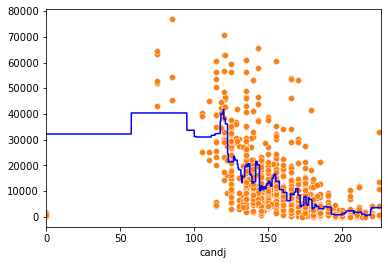

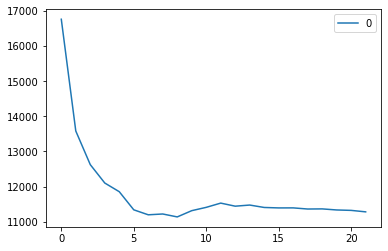

In [40]:
full_knn('candj')

In [ ]:
#full_knn('weight')
# Doesn't show a trend

In [ ]:
#full_knn('age')
# Doesn't show a trend

In [ ]:
full_knn('deadlift')

In [ ]:
full_knn('filthy50')

Subsetted for Females
Using a Subset of Predictors
(helen, grace, fran, pullups, backsq)
RMSE value for k=  1 is: 9395.920559172779
RMSE value for k=  2 is: 8575.53695869827
RMSE value for k=  3 is: 8540.001788762313
RMSE value for k=  4 is: 8731.259711601102
RMSE value for k=  5 is: 8793.397297323227
RMSE value for k=  6 is: 8875.190864614313
RMSE value for k=  7 is: 9113.389010991245
RMSE value for k=  8 is: 9342.641684516637
RMSE value for k=  9 is: 9503.661475263212
RMSE value for k=  10 is: 9765.89590979021
RMSE value for k=  11 is: 9928.887020355061
RMSE value for k=  12 is: 10047.000870761549
RMSE value for k=  13 is: 10030.916644106577
RMSE value for k=  14 is: 10075.916774985944
RMSE value for k=  15 is: 10206.900904823604
RMSE value for k=  16 is: 10285.728536363438
RMSE value for k=  17 is: 10328.42198677636
RMSE value for k=  18 is: 10332.867983320173
RMSE value for k=  19 is: 10340.001570117274
RMSE value for k=  20 is: 10355.815624218458


<AxesSubplot:>

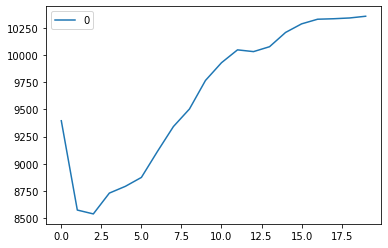

In [43]:
# Different approaches to subset the data to use different
# columns to train and test on

# Use this if you want to subset by the column number
#df1 = X.iloc[:, ]

# Use this if you want to subset by column names
cols = ['helen','grace','fran','pullups', 'backsq']
df1 = X[cols]
#df1.head()
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = .3, random_state=801)
X_train.reset_index()

print("Subsetted for Females")
print("Using a Subset of Predictors")
print("(helen, grace, fran, pullups, backsq)")

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
# Extra Code

In [ ]:
# This code chunk allows you to select which columns
# you would like the knn to be trained on to predict
# and then it will use a for loop to iterate through
# the different values of nearest neighbors from 1-10
num_neighbors = 10
#candj, fran, filthy50
#cols = ['helen','grace','fran']
#df1 = X.iloc[:, ]
#df1 = X[cols]
#df1.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=801)
X_train.reset_index()

acc_val = [] #to store accuracy values for different L
for N in range(num_neighbors):
    N = N+1
    pipe = PipeKNN(N)
    pipe.fit(X_train,y_train)
    print('Score:', pipe.score(X_test, y_test), ' N:', N)
    acc_val.append(pipe.score(X_test, y_test)) #store accuracy values

#param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
#gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
#gs.fit(X_train, y_train)
print(gs.best_params_)


# Some of the best results for accuracy (still fairly low)
# First 100 columns - Score: 0.5433629491409262, L: 4

# cols = ['candj', 'fran', 'filthy50'],
# Score: 0.561768090617294  N: 5

# cols = ['helen','grace','fran']
# Score: 0.5623927641302024  N: 5


